# Exploratory Analysis of RAPTOR metrics in Modern NBA

----

## Analysis

In [3]:
# Dependdencies and set up 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read the csv data file

# df=pd.read_csv("latest_RAPTOR_by_team.csv")
latest=pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")
historical=pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")

In [5]:
latest.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,3.032039,0.000000,3.032039,6.592019,3.065131,9.657150,-0.432080
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,15.456216,15.456216,0.000000,4.482404,2.556956,7.039361,-0.513828
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,0.044927,0.044927,0.000000,-1.817927,-1.624327,-3.442253,-0.751147
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,0.218600,0.000000,0.218600,-0.565843,-1.695077,-2.260920,-0.425337
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,1.968283,1.968283,0.000000,0.141415,-0.835555,-0.694139,-0.315821


In [6]:
historical.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2023,RS,TOR,2328,1140,-2.442459,0.605968,-1.836491,...,-1.771180,-0.283673,-2.054852,0.400488,0.400488,0.000000,-1.867986,-0.182806,-2.050792,-0.956065
1,Steven Adams,adamsst01,2023,RS,MEM,2391,1133,-0.539149,4.174473,3.635324,...,0.416279,3.550985,3.967264,3.892111,3.892111,0.000000,0.025097,3.570024,3.595120,0.237905
2,Bam Adebayo,adebaba01,2023,PO,MIA,1681,850,-2.042952,1.343185,-0.699767,...,-1.667750,1.933160,0.265409,1.342984,0.000000,1.342984,-0.347436,2.167669,1.820232,-0.415820
3,Bam Adebayo,adebaba01,2023,RS,MIA,5252,2598,-1.861596,2.663534,0.801939,...,-1.154758,2.718460,1.563703,5.692164,5.692164,0.000000,-0.957159,2.658545,1.701386,-0.452741
4,Ochai Agbaji,agbajoc01,2023,RS,UTA,2604,1209,-1.323938,-2.198396,-3.522334,...,-1.010696,-1.964927,-2.975622,-0.139469,-0.139469,0.000000,-1.145865,-2.506387,-3.652252,0.216216


In [7]:
merged=pd.merge(latest,historical,how="outer")

In [8]:
merged.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
merged.shape

(30802, 23)

In [10]:
# Find rows and columns with null values.

merged.isnull().sum()

player_name                 0
player_id                   0
season                      0
season_type                 0
team                        0
poss                        0
mp                          0
raptor_offense              0
raptor_defense              0
raptor_total                0
war_total                   2
war_reg_season              1
war_playoffs                1
predator_offense            0
predator_defense            0
predator_total              0
pace_impact                 2
raptor_box_offense      29976
raptor_box_defense      29976
raptor_box_total        29976
raptor_onoff_offense    29976
raptor_onoff_defense    29976
raptor_onoff_total      29976
dtype: int64

In [11]:
merged.fillna(0,inplace=True)
# make sure its inplace=True


In [12]:
merged.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30797    False
30798    False
30799    False
30800    False
30801    False
Length: 30802, dtype: bool

In [13]:
clean_df=merged

In [14]:
clean_df.isnull().sum()

player_name             0
player_id               0
season                  0
season_type             0
team                    0
poss                    0
mp                      0
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             0
raptor_box_offense      0
raptor_box_defense      0
raptor_box_total        0
raptor_onoff_offense    0
raptor_onoff_defense    0
raptor_onoff_total      0
dtype: int64

## Summary Statistics

In [15]:
clean_df.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
count,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000,30802.000000
mean,2002.378027,1755.939225,868.431595,-1.264547,-0.304916,-1.569463,1.262330,1.141831,0.120499,-1.276771,-0.555730,-1.832501,0.239100,-0.033054,-0.007132,-0.040186,-0.057653,0.025346,-0.032308
std,13.298891,1814.174259,892.120299,4.684217,3.498377,6.250079,2.573826,2.582504,0.480043,4.285883,3.325879,6.082903,1.076565,0.923799,0.924770,1.344509,1.608631,1.154272,1.754432
min,1977.000000,1.000000,0.000000,-82.192072,-64.767567,-103.084801,-7.382978,-7.382978,-1.376520,-75.354256,-59.165453,-101.442650,-10.816306,-74.359220,-64.933861,-71.012853,-74.277126,-35.366970,-70.845934
25%,1991.000000,246.000000,124.000000,-3.033221,-1.599191,-3.826458,-0.070194,-0.003352,0.000000,-3.065839,-1.823482,-4.239410,-0.284012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2003.000000,993.000000,496.000000,-1.011465,-0.382257,-1.202516,0.225492,0.000000,0.000000,-1.129676,-0.496316,-1.481888,0.110558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,3009.000000,1492.750000,0.905199,0.935731,1.245930,1.667049,1.361220,0.000000,0.800120,0.860693,1.170140,0.604533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,8303.000000,3638.000000,77.832825,106.990655,157.240367,24.355978,24.355978,7.006934,80.672308,90.410920,157.642115,23.732669,29.980748,58.195329,57.253239,30.687169,61.557315,55.533363


#### Statistics by team

#### Statistics by player

### Does the amount of possessions per player greatly impact that player’s overall RAPTOR ratings? Why or why not?

In [16]:
possesion=clean_df.groupby("player_name")["poss"].sum()
possesion.sort_values(ascending=False,inplace=True)

In [17]:
possesion=possesion.head(10)
possesion

player_name
LeBron James     128473
Karl Malone      123364
Eddie Johnson    116608
Dirk Nowitzki    111816
Kobe Bryant      111608
Robert Parish    108377
Jason Kidd       108362
Tim Duncan       107932
John Stockton    107052
Kevin Garnett    106536
Name: poss, dtype: int64

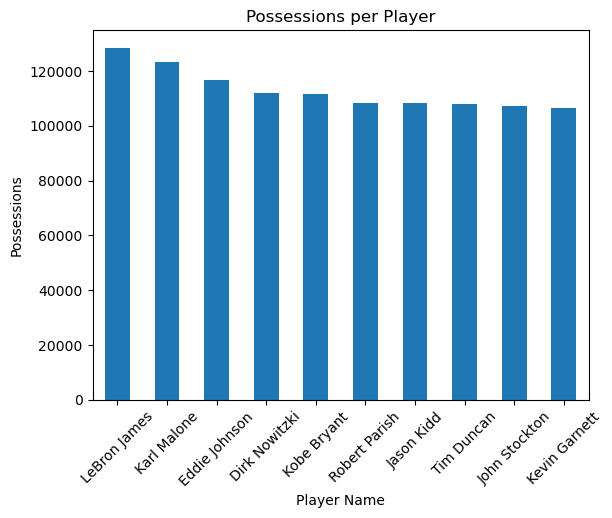

In [18]:
possesion.plot(kind="bar",rot = 45)
plt.title("Possessions per Player")
plt.xlabel("Player Name")
# plt.xticks("1-10")
plt.ylabel("Possessions")
plt.show()

In [19]:
clean_df.columns

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total'],
      dtype='object')

In [20]:
raptor = clean_df.groupby("player_name")["raptor_total"].sum()
raptor = raptor.sort_values(ascending=False)
raptor = raptor.head(10)
raptor

player_name
John Stockton     290.365206
LeBron James      280.151964
Chris Paul        239.826136
Michael Jordan    234.114848
Lester Conner     194.700100
Magic Johnson     192.363617
Tim Duncan        187.131456
Manu Ginobili     185.421273
Jason Kidd        181.600623
James Harden      177.804488
Name: raptor_total, dtype: float64

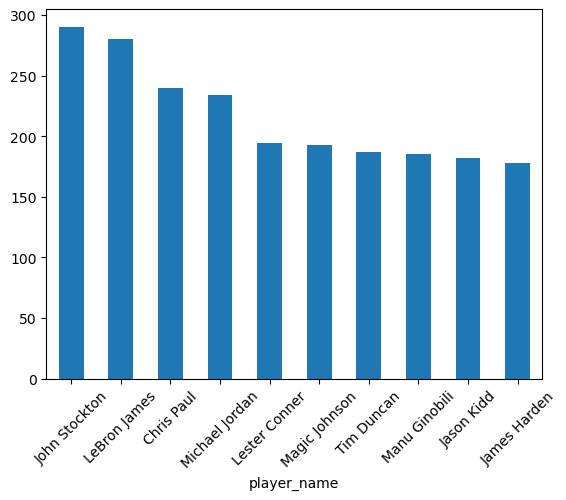

In [21]:
raptor.plot(kind="bar",rot = 45)
# plt.xticks(np(10))
plt.show()

In [22]:
# top ten possession players and thier raptor scores.
# top 10 raptor players and thier possessions.

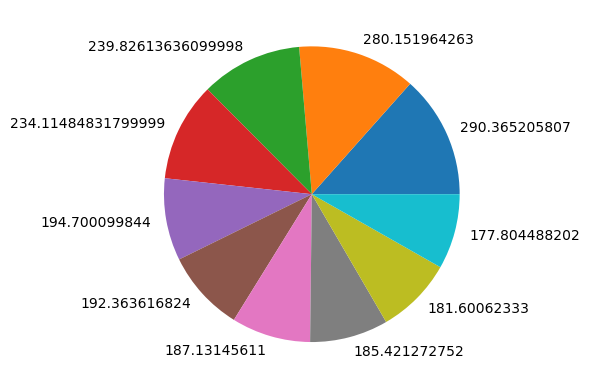

In [23]:
plt.pie(raptor,labels=raptor)
plt.show()

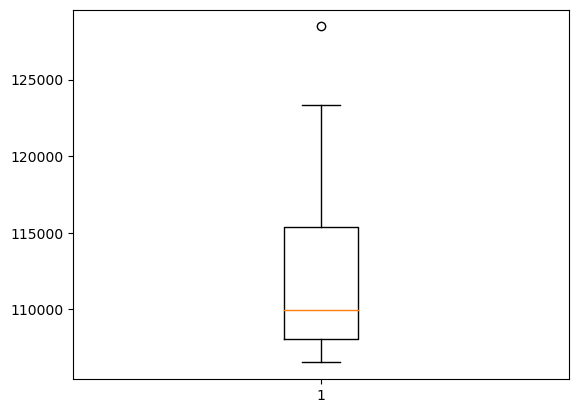

In [24]:
plt.boxplot(possesion)
plt.show()

In [25]:
raptor

player_name
John Stockton     290.365206
LeBron James      280.151964
Chris Paul        239.826136
Michael Jordan    234.114848
Lester Conner     194.700100
Magic Johnson     192.363617
Tim Duncan        187.131456
Manu Ginobili     185.421273
Jason Kidd        181.600623
James Harden      177.804488
Name: raptor_total, dtype: float64

In [26]:
possesion

player_name
LeBron James     128473
Karl Malone      123364
Eddie Johnson    116608
Dirk Nowitzki    111816
Kobe Bryant      111608
Robert Parish    108377
Jason Kidd       108362
Tim Duncan       107932
John Stockton    107052
Kevin Garnett    106536
Name: poss, dtype: int64

In [27]:
poss_vs_raptor=pd.DataFrame({"Possesions": possesion,
             "Raptor Total": raptor})
poss_vs_raptor

,Possesions,Raptor Total
player_name,,
Chris Paul,NaN,239.826136
Dirk Nowitzki,111816.0,NaN
Eddie Johnson,116608.0,NaN
James Harden,NaN,177.804488
Jason Kidd,108362.0,181.600623
John Stockton,107052.0,290.365206
Karl Malone,123364.0,NaN
Kevin Garnett,106536.0,NaN
Kobe Bryant,111608.0,NaN


In [28]:
# poss_vs_raptor.fillna(0,inplace=True)
# poss_vs_raptor

In [29]:
# plt.hist(poss_vs_raptor)

# plt.show()

In [30]:
df=pd.DataFrame(clean_df.groupby("player_name")["raptor_total","poss"].sum())
top_10_poss=df.sort_values(by="poss",ascending=False).head(10)

C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [31]:
top_10_poss

,raptor_total,poss
player_name,,
LeBron James,280.151964,128473
Karl Malone,94.515798,123364
Eddie Johnson,-31.844547,116608
Dirk Nowitzki,122.126837,111816
Kobe Bryant,120.162822,111608
Robert Parish,33.183203,108377
Jason Kidd,181.600623,108362
Tim Duncan,187.131456,107932
John Stockton,290.365206,107052


In [32]:
top_10_raptor=df.sort_values(by="raptor_total",ascending=False).head(10)
top_10_raptor

,raptor_total,poss
player_name,,
John Stockton,290.365206,107052
LeBron James,280.151964,128473
Chris Paul,239.826136,93107
Michael Jordan,234.114848,94834
Lester Conner,194.700100,31985
Magic Johnson,192.363617,86318
Tim Duncan,187.131456,107932
Manu Ginobili,185.421273,63833
Jason Kidd,181.600623,108362


### Which team displayed the highest/lowest RAPTOR ratings across the 2022-23 season across all players? How does this data compare to their predictive PREDATOR model?


### How accurate are the overall results of historical RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

In [33]:
historical=pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
latest=pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

In [34]:
historical.keys()

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [37]:
latest.keys()

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [35]:
historical.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2023,RS,TOR,2328,1140,-2.442459,0.605968,-1.836491,...,-1.771180,-0.283673,-2.054852,0.400488,0.400488,0.000000,-1.867986,-0.182806,-2.050792,-0.956065
1,Steven Adams,adamsst01,2023,RS,MEM,2391,1133,-0.539149,4.174473,3.635324,...,0.416279,3.550985,3.967264,3.892111,3.892111,0.000000,0.025097,3.570024,3.595120,0.237905
2,Bam Adebayo,adebaba01,2023,PO,MIA,1681,850,-2.042952,1.343185,-0.699767,...,-1.667750,1.933160,0.265409,1.342984,0.000000,1.342984,-0.347436,2.167669,1.820232,-0.415820
3,Bam Adebayo,adebaba01,2023,RS,MIA,5252,2598,-1.861596,2.663534,0.801939,...,-1.154758,2.718460,1.563703,5.692164,5.692164,0.000000,-0.957159,2.658545,1.701386,-0.452741
4,Ochai Agbaji,agbajoc01,2023,RS,UTA,2604,1209,-1.323938,-2.198396,-3.522334,...,-1.010696,-1.964927,-2.975622,-0.139469,-0.139469,0.000000,-1.145865,-2.506387,-3.652252,0.216216


In [36]:
latest.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,3.032039,0.000000,3.032039,6.592019,3.065131,9.657150,-0.432080
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,15.456216,15.456216,0.000000,4.482404,2.556956,7.039361,-0.513828
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,0.044927,0.044927,0.000000,-1.817927,-1.624327,-3.442253,-0.751147
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,0.218600,0.000000,0.218600,-0.565843,-1.695077,-2.260920,-0.425337
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,1.968283,1.968283,0.000000,0.141415,-0.835555,-0.694139,-0.315821


In [53]:
historical["raptor_total"].sum()

-1260.8802687799998

In [54]:
historical["predator_total"].sum()

-1642.470212406

In [55]:
latest["raptor_total"].sum()

-47081.733115537005

In [56]:
latest['predator_total'].sum()

-54802.213371065

In [51]:
raptor_total = clean_df.groupby("player_name")["raptor_total"].sum()

In [52]:
raptor_total

player_name
A.C. Green            -5.311204
A.J. Bramlett         -9.820485
A.J. English          -8.779331
A.J. Guyton          -16.723745
A.J. Lawson          -29.105705
                        ...    
Zion Williamson        7.994044
Zoran Dragic         -20.790452
Zoran Planinic       -37.845044
Zydrunas Ilgauskas    -5.899477
Zylan Cheatham       -54.175932
Name: raptor_total, Length: 3657, dtype: float64

### In what ways does the RAPTOR model accurately showcase a team’s Win/Loss ratio? In what ways does it not

### How do these statistics line up by player in relation to the top players/teams (MVPs) of the 2022-2023 season?

In [25]:
### Maybe add more analysis, like assign pyschool, by scores, size and budget.